<img src="https://raw.githubusercontent.com/UCLAMAEThreads/MAE103/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 103 - Elementary Fluid Mechanics**
<hr />

# Dimensionless quantities
In this notebook, we will learn about making quantities dimensionless,
and the physical significance of this.

### Set up the module

In [1]:
using MAE103

In [2]:
using Plots

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6231e40619c15148bcb80aa19d731e629877d762/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/dd1a970b543bd02efce2984582e996af28cab27f/build.log`
objc[46620]: Class RunLoopModeTracker is implemented in both /Users/jeff/.julia/artifacts/ee74d003b12e6dd5f748e8cefb1688edbdfb184b/lib/QtCore.framework/Versions/5/QtCore (0x148621aa8) and /Users/jeff/.julia/conda/3/lib/libQt5Core.5.9.7.dylib (0x15a8b7a80). One of the two will be used. Which one is undefined.


In the previous notebook, we made a plot of the velocity field in a gap
between two walls. We'll regenerate the plot here for reference:

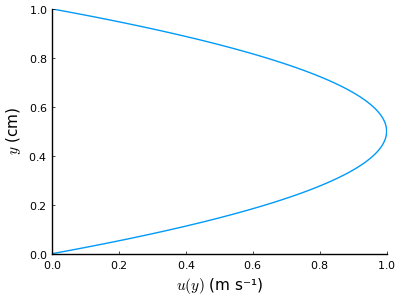

In [3]:
u(y,Uc,H) = 4*Uc/H^2*y*(H-y)
H = 1u"cm"
Uc = 1u"m/s"
y = range(0u"cm",H,length=101)
v = u.(y,Uc,H)
plot(v,y,xlim=(0,Inf),ylim=(0,Inf),xlabel=L"u(y)",ylabel=L"y")

In this plot, the data have units---they are *dimensional* data.
This is useful, since the plot not only conveys the velocities, but
also the gap size and the flow speed.

Let us also note that the plot is quite specific, since it only shows
the plot for *one* choice of gap size (1 cm) and *one* choice of flow speed (1 m/s).
Of course, it is not difficult for us to get plots at different gap sizes
and flow speeds by simply changing the parameters.

But suppose that these data were measured in an experiment. For the experiment,
let's say we constructed one gap $H$, we applied one flow speed $U_c$, and
we measured the resulting profile of fluid velocity across the gap. Then this plot,
at these specific conditions, would not be directly useful to someone else who would like
to know the velocity profile in a different size gap at a different flow speed.

If, instead, we divide the velocity data `v` by flow speed `Uc` and divide the position
data `y` by gap size `H`, then we "scale out" the specific choices for these parameters:

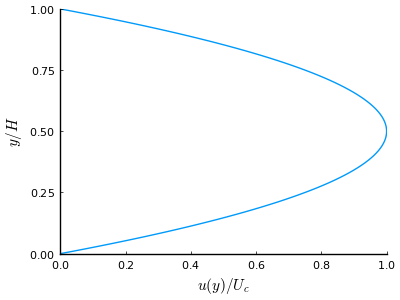

In [4]:
plot(v/Uc,y/H,xlim=(0,Inf),ylim=(0,Inf),xlabel=L"u(y)/U_c",ylabel=L"y/H",yticks=0:0.25:1)

This is a *dimensionless plot*. The values on each axis have no units: they are
called *dimensionless* or *non-dimensional* quantities.

This plot is more directly useful to another person, because they can read off
the values for a particular position *as a fraction of gap height*,
and find the velocity *as a fraction of the centerline velocity*. Then, they can
"scale" the value to their own situation.

For example, if a person whose gap size is $H = 3$ cm and centerline velocity is
$0.5$ m/s wishes to know the velocity at $y = 0.6$ cm, they calculate $y/H = 0.6/3 = 0.2$
and look up on the plot that $y/H = 0.2$ corresponds to $u/U_c = 0.64$. Thus,
for this person's case, $u = 0.64\times0.5$ m/s  $= 0.32$ m/s.

### Unit as a reference quantity.
The principle of "scaling out" the parameters is very important. But before we
go deeper into this, let us make an observation on units.

A unit is a reference value, and this reference is standardized so we can communicate
results with one another on a common foundation. What does it mean to be a reference?

When we measure something, it is important to remember that the thing we're measuring is not
intrinsically tied to any unit. It is more abstract than that. For example, the
distance between two points is a physical fact. Our measurement of that distance with
a particular set of units is simply one way (of many) quantifying that fact.

With that measurement, we are simply comparing that something with another
thing that has been calibrated on a particular unit system. A ruler is the easiest
example of this: the ruler was constructed by marking off lines on a stick,
with each line determined from some other calibrated tool that the ruler manufacturer used.
Ultimately, all of these measurement tools refer back to some ultimate standard
for the unit (e.g. for a meter, it is length of the path travelled by light in a
vacuum in 1/(299,792,458) of a second.) As long as we all agree on this standard,
we can communicate with each other.

However, we don't quite all agree. Most use SI units, but many still use imperial.
So we need conversion factors, and there is opportunity to make mistakes.

### A more physically-meaningful reference quantity.
As we discussed earlier, when we measure something, we are making a comparison
with a standardized unit. We can think of this comparison as a ratio of the
physical quantity with the standard unit. For example, if we were to say the gap $H$ was
0.1 cm high, we could also write this statement as

$$\dfrac{H}{1\,\mathrm{cm}} = 0.1$$

However, this unit is a reference that we (humans) invented, so it is completely irrelevant
to physics.

On the other hand, if we instead choose as a reference some parameter
in the problem itself, then we are much more likely to have a *physically
meaningful* reference. In our example problem, the gap height is clearly physically
meaningful, so it serves as a natural *length scale*. The centerline velocity
is a natural *velocity scale*. These are our *reference scales*.

Actually, the statement that the dimensionless velocity plot has "no units" isn't
quite true. There *are* units on this plot. The units of position are "gap heights"
and the units of velocity are "centerline velocities". We can say, for example,
the: "the velocity at 0.2 gap heights from the lower wall is 0.64 times the centerline
velocity"). The huge advantage of this "local" system of units is that it requires no
standarization or international governing body. It is unambiguous to *anyone*,
including to an alien species.

**In summary**, there are several advantages to the dimensionless view:
- There is no ambiguity about which system we used. It doesn't matter if
  the original parameters and values were in SI or imperial.
- Since the laws of physics hold regardless of our system of units, this sort of plot
    reveals true physical relationships between velocity and location.
- The dimensionless relationship between $u/U_c$ and $y/H$ is *universal*: it holds
  for *every* gap size and
  *every* flow speed. We know that this is true here because the exact velocity
  field was actually known to us:

  $$u(y) = \frac{4U_c}{H^2} y (H - y)$$

  But let's divide this by $U_c$ and group $y$ with $H$:

  $$\dfrac{u}{U_c} = 4 \dfrac{y}{H}\left(1 - \dfrac{y}{H}\right)$$

  This shows that $u/U_c$ depends on $y/H$ *and nothing
else*. There are no "free" parameters in this dimensionless relationship. We
will return to this point in the next notebook.
- We are lucky here because we already knew the mathematical equation. In most
cases, we aren't this lucky. But as we will discuss in the next notebook, once we
  ascertain the number of dimensionless quantities that fully describe a relationship,
  we can develop an *empirical correlation of data*. This correlation should *only* be
  pursued on dimensionless data. A correlation with dimensional coefficients is
  truly useless.

### Dimensional homogeneity
One last point before move on. When we non-dimensionalize a quantity by a reference
quantity, they need to be in the same units. If they're not, then we need to
make sure the conversion factors are accounted for. For example, let's suppose
that the velocites in $u$ are measured in m/s, but the centerline velocity $U_c$ was
measured in ft/s. We obviously have to deal with the conversion between ft and
m to take the ratio $u/U_c$.

A conversion factor between two systems of units
is itself a dimensionless quantity. We can obtain the numerical factor with the
help of the `DimensionlessParameter` function. For example, let's consider the
conversion factor from feet to meters.

In [5]:
DimensionlessParameter(1u"m"/1u"ft")

DimensionlessParameter = 3.2808398950131235

We would multiply $U_c$ in ft/s by this factor to convert it to m/s.

But we can actually make use of a neat feature to skip this step, because
these software tools will carry out the conversion for us! For example, if
we divide $u = 0.5$ m/s by $U_c = 3$ ft/s:

In [6]:
DimensionlessParameter(0.5u"m/s"/3u"ft/s")

DimensionlessParameter = 0.5468066491688539

This name `DimensionlessParameter` isn't very descriptive! It might
be nice to use a more specific name for this quantity. Let's create
a new function that we can use to set this dimensionless velocity:

In [7]:
@nondimvar DimensionlessVelocity

Now we can use this to set the ratio of velocities:

In [8]:
u_nd = DimensionlessVelocity(0.5u"m/s"/3u"ft/s")

DimensionlessVelocity = 0.5468066491688539

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*